# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Открытие файла с данными и изучение общей информации.

In [1]:
# Импортируем библиотеки и настраиваем параметры
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Открываем датасет
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

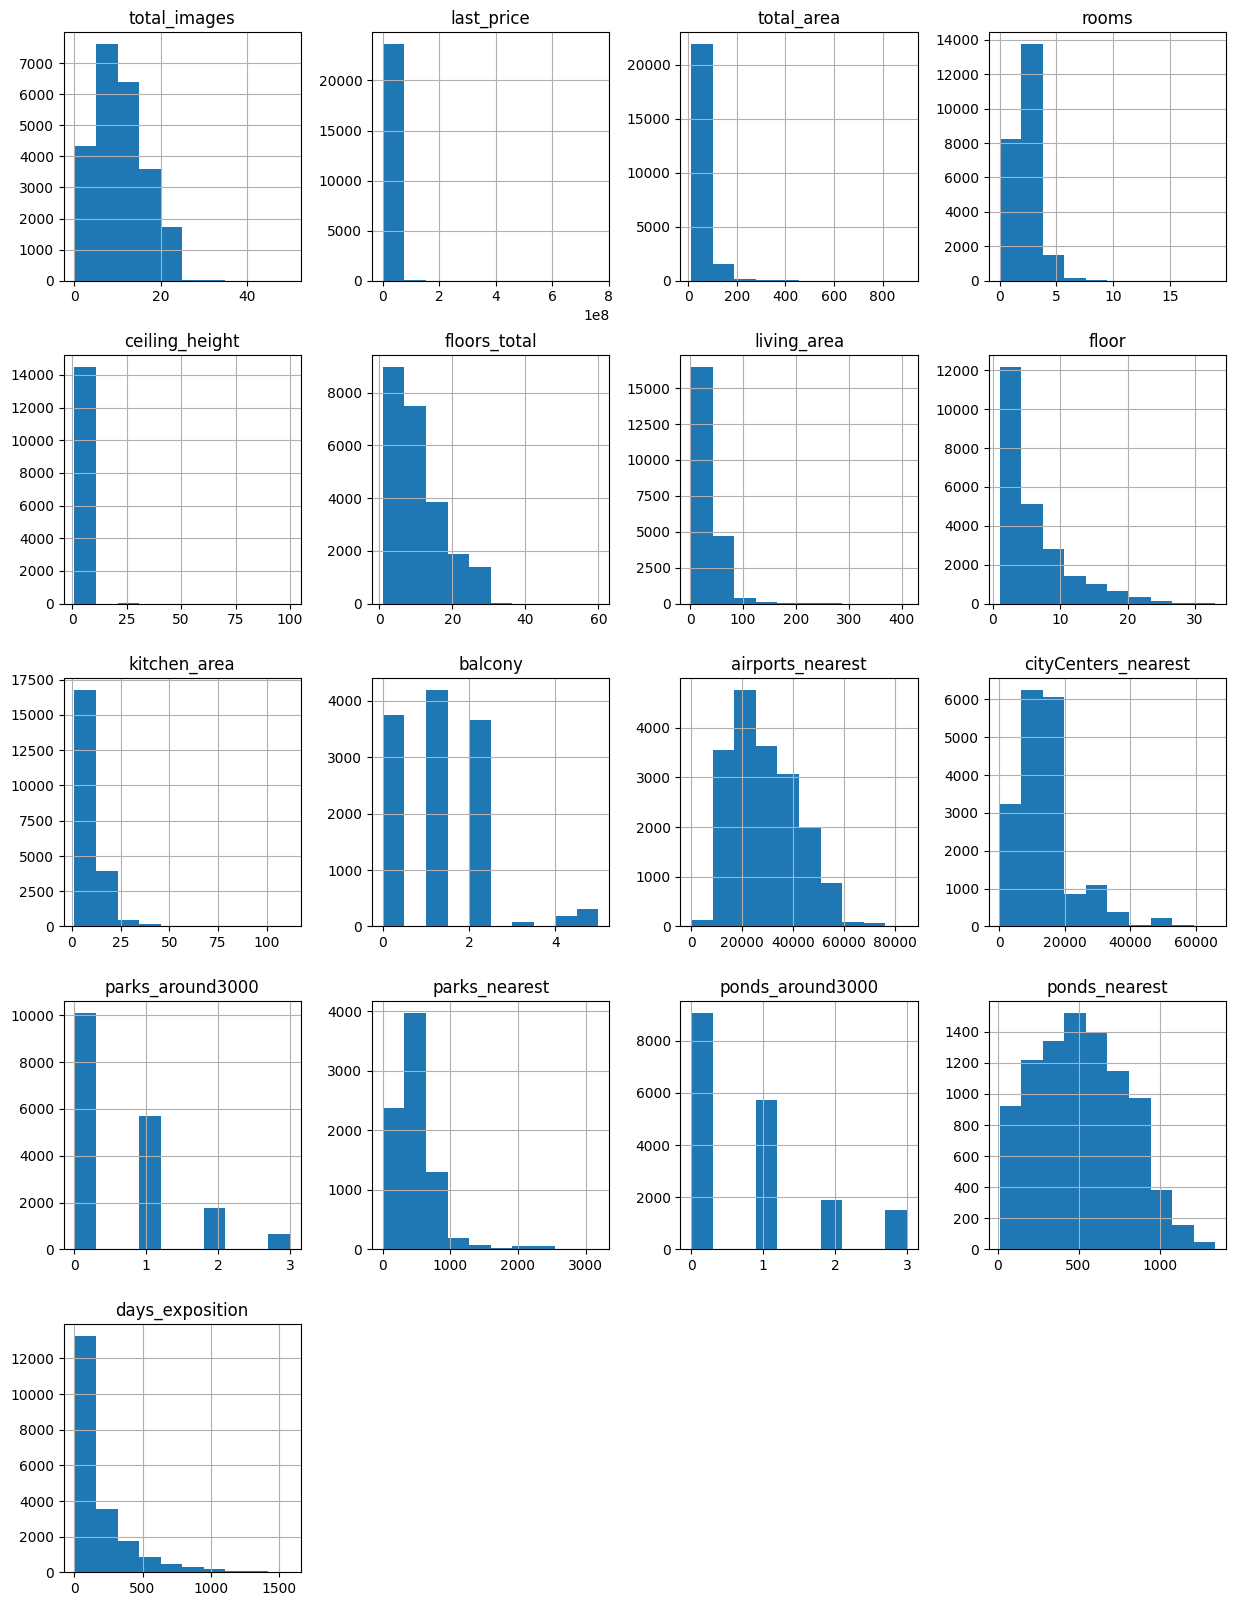

In [5]:
data.hist(figsize=(15, 20))
plt.show()

### Вывод

В исходных данных присутствуют пропуски значений, неверные типы данных. Далее проведем предобработку данных для исправления вышеуказанных проблем, а так же, для поиска и исправления неявных дубликатов и аномалий.

## Предобработка данных.

### Работа с пустыми значениями.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].isna().sum()

0

In [8]:
data.is_apartment.fillna(False, inplace=True)
data.is_apartment.isna().sum()

0

In [9]:
data.locality_name.fillna('Не указано', inplace=True)
data.locality_name.isna().sum()

0

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вероятнее всего пропуски в данных могли появиться потому что пользователи не указали некоторые данные в объявлении.

### Работа с типами данных.

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].sample(10)

4826    2019-03-03
18333   2017-09-06
9207    2018-06-06
22912   2018-07-06
6858    2019-02-24
13446   2016-04-17
21107   2018-09-24
13423   2018-11-17
2277    2017-11-18
18502   2019-03-11
Name: first_day_exposition, dtype: datetime64[ns]

In [12]:
data.is_apartment.astype('bool')
data.is_apartment.dtype

dtype('bool')

In [13]:
data['balcony'] = data['balcony'].astype('int')
data.balcony.dtype

dtype('int32')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Типы данных необходимо было изменить, чтобы иметь возможность выполнять математические операции со столбцами.

### Обработка неявных дубликатов.

In [15]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
data.locality_name.value_counts().head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [17]:
bad_name_parts = ['городской ','городского типа ', 'коттеджный ', 'при железнодорожной ', 'станции ','Пансионат ', 'село ', \
                  'садоводческое некоммерческое товарищество ', 'садовое товарищество ', 'поселок ', 'посёлок ', 'деревня ']


def get_short_name(value):
    for p in bad_name_parts:
        value = value.replace(p, '')
    return value


data.locality_name = data.locality_name.apply(get_short_name)

In [18]:
data.locality_name.value_counts().head(10)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

После обработки неявных дубликатов Кудрово встало на третью позицию по популярности в нашем датасете.

### Работа с аномалиями.

Рассмотрим высоту потолков

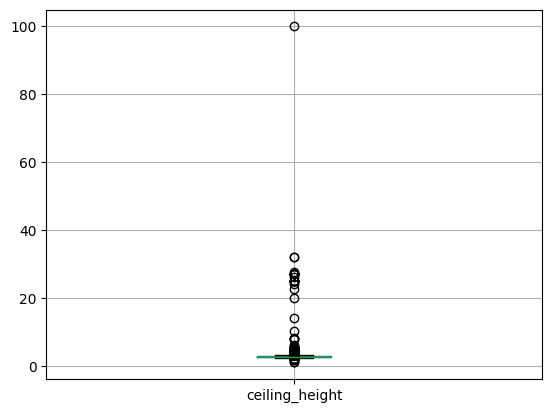

In [19]:
data.boxplot('ceiling_height')
plt.show()

In [20]:
data.query('ceiling_height > 10').ceiling_height.describe()

count     25.000000
mean      27.976000
std       15.691937
min       10.300000
25%       25.000000
50%       26.000000
75%       27.000000
max      100.000000
Name: ceiling_height, dtype: float64

Среди высоты потолков присутствует некоторое количество объявлений, в которых или из-за технических ошибок, или из-за ошибок пользователей оказались значения превышающие реальные в 10 раз. Исправим это.

In [21]:
data.loc[data['ceiling_height'] > 10,
         'ceiling_height'] = data.loc[data['ceiling_height'] > 10,
                                      'ceiling_height'] / 10
data['ceiling_height'].describe()

count    14504.000000
mean         2.728100
std          0.299855
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Рассмотрим стоимость квартиры

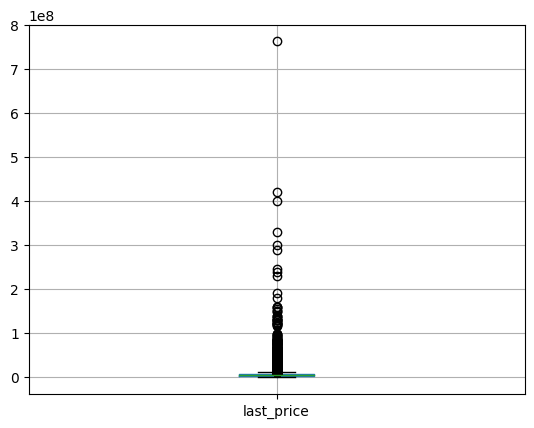

In [22]:
data.boxplot('last_price')
plt.show()

На гистограмме с усами видим длинный хвост над отметкой в 175000000рублей, что указывает на наличие аномально больших значений. Посмотрим какую часть данных мы потеряем, если отбросим их.

In [23]:
100 - data.query('last_price < 175000000')['last_price'].shape[0] / data['last_price'].shape[0] * 100

0.04641546056795676

0.05% данных совсем не страшная потеря, смело убираем эти значения из датасета

In [24]:
new_data = data.query('last_price < 175000000')

Рассмотрим количество комнат

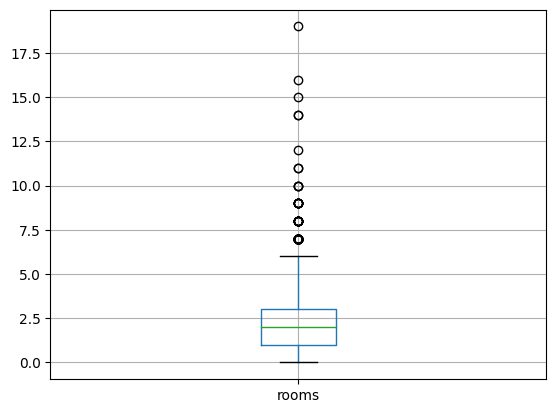

In [25]:
data.boxplot('rooms')
plt.show()

In [26]:
100 - data.query('rooms <= 7')['last_price'].shape[0] / data['last_price'].shape[0] * 100

0.13080720705515603

Квартиры с количеством комнат больше 7ми встречаются достаточно редко, 0.1% от всех случаев. Для нашего исследования данные о них не нужны - отбросим их.

In [27]:
new_data = new_data.query('rooms <= 7')

Рассмотрим общую площадь

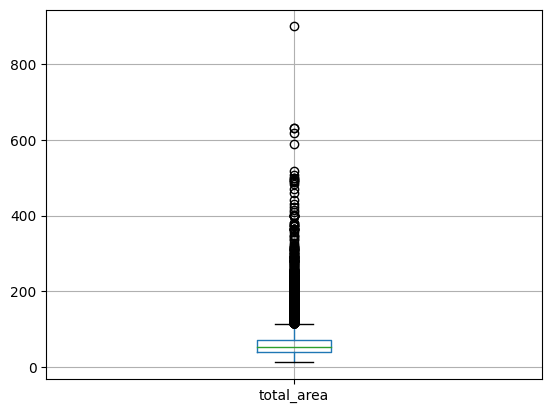

In [28]:
data.boxplot('total_area')
plt.show()

На диаграмме размаха по общей площади видно лысеющий хвост выше значения в 500м.

In [29]:
100 - data.query('total_area < 500').shape[0] / data.shape[0] * 100

0.037976285919242514

Эти значения составляют всего 0.04% от всех данных, отбросим их.

In [30]:
new_data = new_data.query('total_area < 500')

Проверим насколько истощал наш датасет после отброса ненужных для исследования значений.

In [31]:
100 - new_data.shape[0] / data.shape[0] * 100

0.18988142959618415

Потеряли всего 0.2% данных

In [32]:
data = new_data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23654 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23654 non-null  int64         
 1   last_price            23654 non-null  float64       
 2   total_area            23654 non-null  float64       
 3   first_day_exposition  23654 non-null  datetime64[ns]
 4   rooms                 23654 non-null  int64         
 5   ceiling_height        14474 non-null  float64       
 6   floors_total          23568 non-null  float64       
 7   living_area           21755 non-null  float64       
 8   floor                 23654 non-null  int64         
 9   is_apartment          23654 non-null  bool          
 10  studio                23654 non-null  bool          
 11  open_plan             23654 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

В результате обработки аномальных значений потеряли 0.2% данных, что не скажется на достоверности результатов исследования.

### Вывод

- В исходном датасете некоторые данные отсутствуют потому что пользователи не указали их в объявлении. Наиболее очевидные вещи я заполнил подходящими по смыслу значениями, остальные решил не трогать. 
- Некоторые типы данных исходного датасета были непригодными для выполнения с ними математических операций - они были исправлены в процессе предобработки.
- В столбце с названиями населенных пунктов были неявные дубликаты, которые могли помешать достоверности рассчетов - они были обработаны.
- В столбце с высотой потолков возникли аномалии вызванные тем, что некоторые пользователи указали данные в неправильном формате - эти данные были исправлены. Так же в столбцах со стоимостью квартиры, количеством комнат и общей площади были обнаружены и отброшены аномальные значения.

## Добавление новых столбцов в таблицу для дальнейших рассчетов.

In [33]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price'].head(10)

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
6     99195.710456
7    110544.692737
8     87454.764777
9     88524.590164
Name: square_meter_price, dtype: float64

In [34]:
data['exposition_weekday'] = pd.DatetimeIndex(
    data['first_day_exposition']).weekday
data['exposition_weekday'].head(10)

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: exposition_weekday, dtype: int64

In [35]:
data['exposition_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['exposition_month'].head(10)

0     3
1    12
2     8
3     7
4     6
5     9
6    11
7     4
8     5
9     2
Name: exposition_month, dtype: int64

In [36]:
data['exposition_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['exposition_year'].head(10)

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: exposition_year, dtype: int64

In [37]:
def get_floor_type(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    return 'Другой'


data['floor_type'] = data.apply(get_floor_type, axis=1)
data['floor_type'].value_counts()

Другой       17426
Последний     3341
Первый        2887
Name: floor_type, dtype: int64

In [38]:
data_center_km = data['cityCenters_nearest'].dropna()
data_center_km = data_center_km / 1000
data_center_km = data_center_km.astype('int')
data['km_to_center'] = data_center_km
data['km_to_center'].head(10)

0    16.0
1    18.0
2    13.0
3     6.0
4     8.0
5     NaN
6    19.0
7    11.0
8     NaN
9    15.0
Name: km_to_center, dtype: float64

### Вывод

Добавил новые столбцы в таблицу data, где 
- square_meter_price - цена одного квадратного метра,
- exposition_weekday - день недели публикации объявления,
- exposition_month - месяц публикации объявления,
- exposition_year - год публикации объявления,
- floor_type - тип этажа квартиры («первый», «последний», «другой»),
- km_to_center - расстояние до центра города в километрах.

## Исследовательский анализ данных.

### Гистограммы для отдельных параметров объектов.

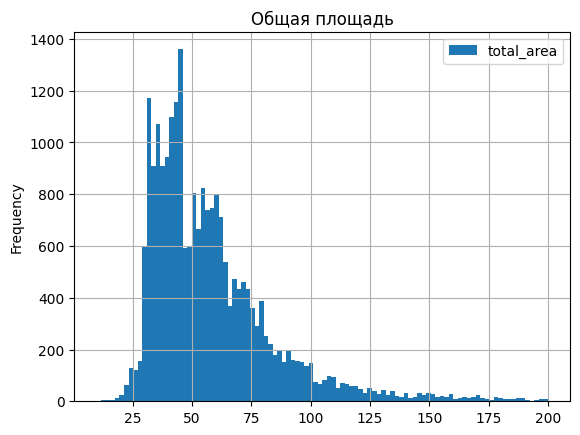

In [39]:
data.plot(y='total_area',
          kind='hist',
          bins=100,
          range=(10, 200),
          grid=True,
          title='Общая площадь')
plt.show()

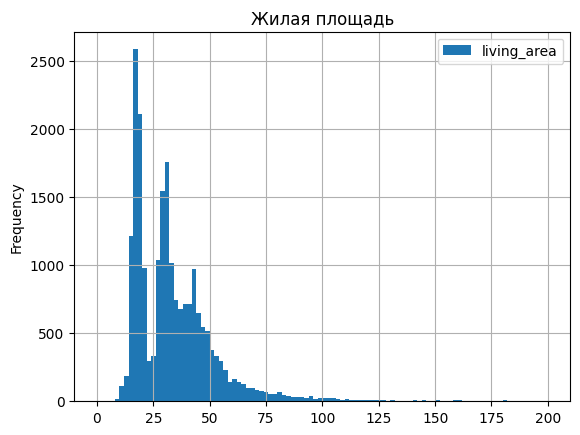

In [40]:
data.plot(y='living_area',
          kind='hist',
          bins=100,
          range=(0, 200),
          grid=True,
          title='Жилая площадь')
plt.show()

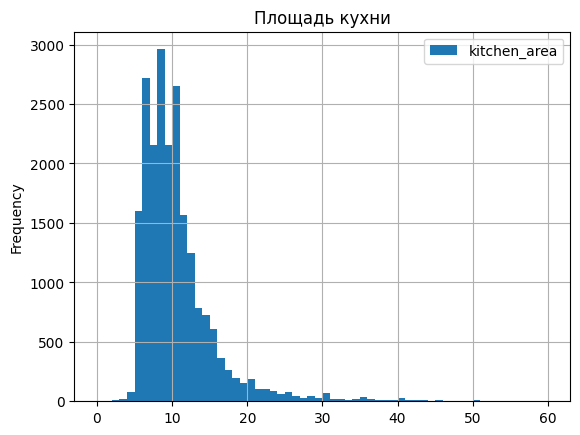

In [41]:
data.plot(y='kitchen_area',
          kind='hist',
          bins=60,
          range=(0, 60),
          grid=True,
          title='Площадь кухни')
plt.show()

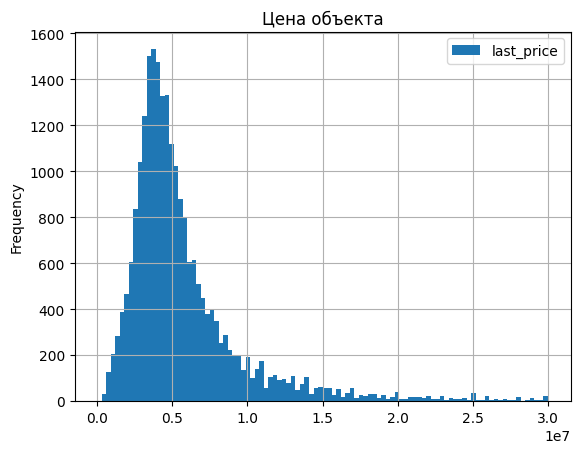

In [42]:
data.plot(y='last_price',
          kind='hist',
          bins=100,
          range=(0, 30000000),
          grid=True,
          title='Цена объекта')
plt.show()

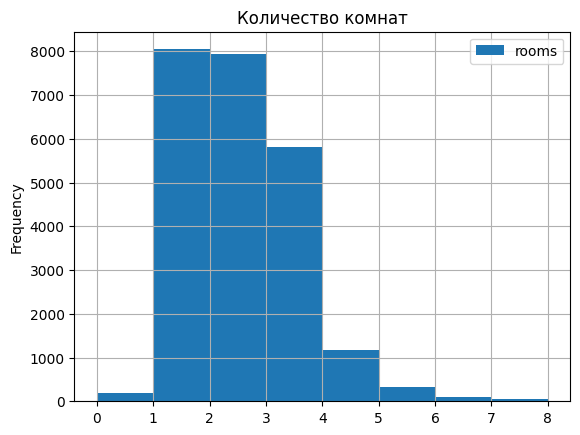

In [43]:
data.plot(y='rooms',
          kind='hist',
          bins=8,
          range=(0, 8),
          grid=True,
          title='Количество комнат')
plt.show()

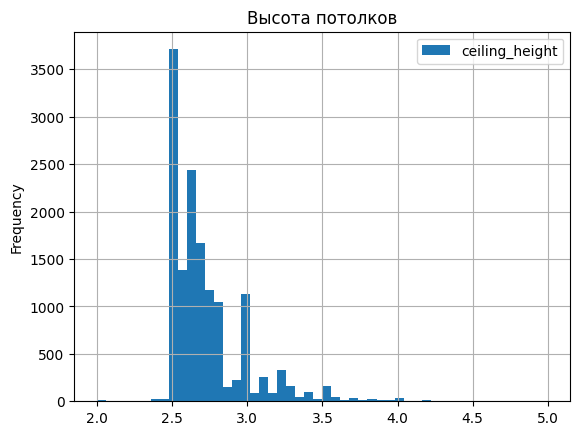

In [44]:
data.plot(y='ceiling_height',
          kind='hist',
          bins=50,
          range=(2, 5),
          grid=True,
          title='Высота потолков')
plt.show()

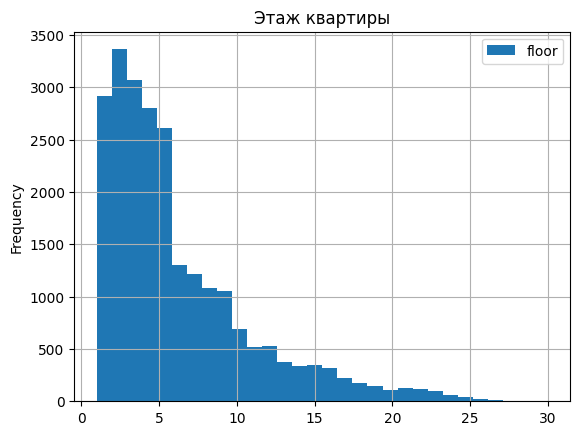

In [45]:
data.plot(y='floor',
          kind='hist',
          bins=30,
          range=(1, 30),
          grid=True,
          title='Этаж квартиры')
plt.show()

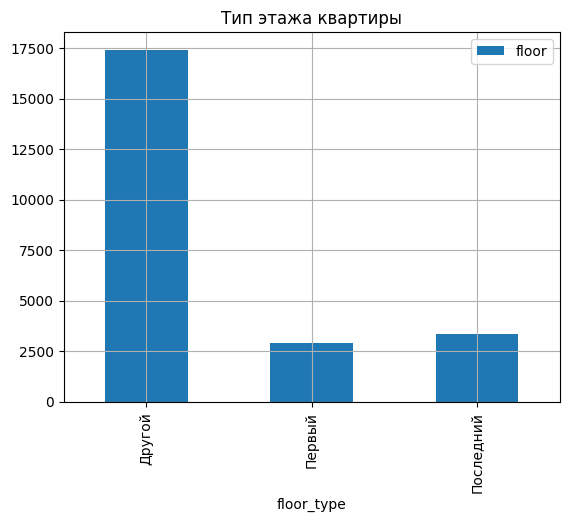

In [46]:
(
    data.pivot_table(index='floor_type', values='floor',aggfunc='count')
    .plot(kind='bar', title='Тип этажа квартиры', grid=True)
)
plt.show()

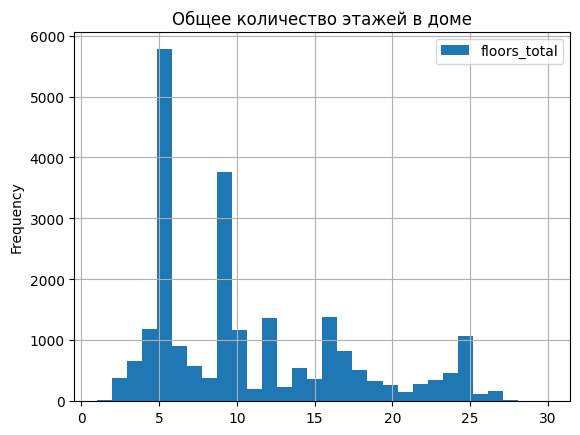

In [47]:
data.plot(y='floors_total',
          kind='hist',
          bins=30,
          range=(1, 30),
          grid=True,
          title='Общее количество этажей в доме')
plt.show()

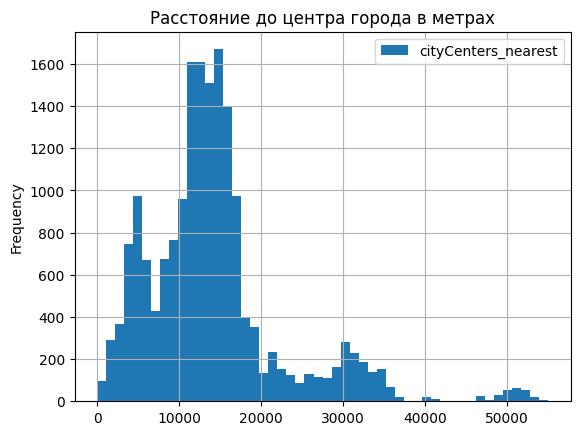

In [48]:
data.plot(y='cityCenters_nearest',
          kind='hist',
          bins=50,
          range=(0, 55000),
          grid=True,
          title='Расстояние до центра города в метрах')
plt.show()

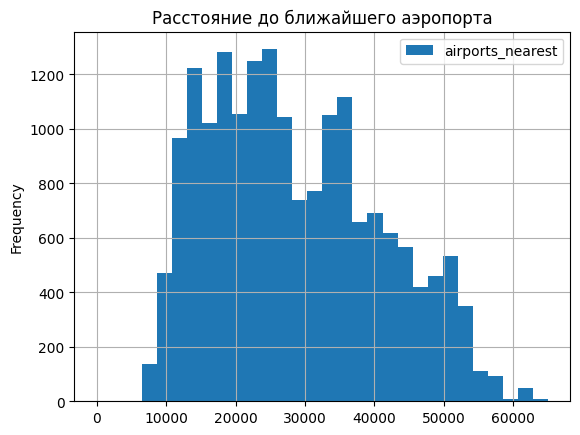

In [49]:
data.plot(y='airports_nearest',
          kind='hist',
          bins=30,
          range=(0, 65000),
          grid=True,
          title='Расстояние до ближайшего аэропорта')
plt.show()

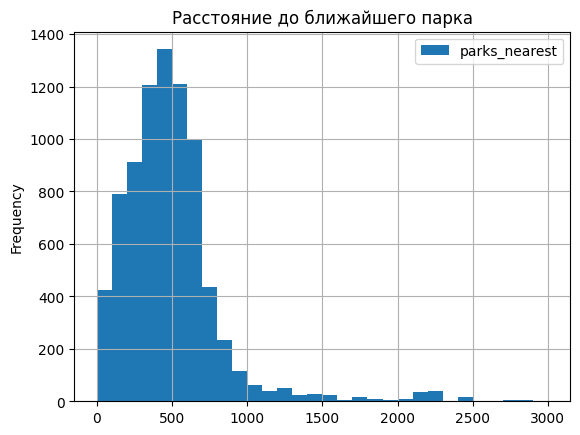

In [50]:
data.plot(y='parks_nearest',
          kind='hist',
          bins=30,
          range=(0, 3000),
          grid=True,
          title='Расстояние до ближайшего парка')
plt.show()

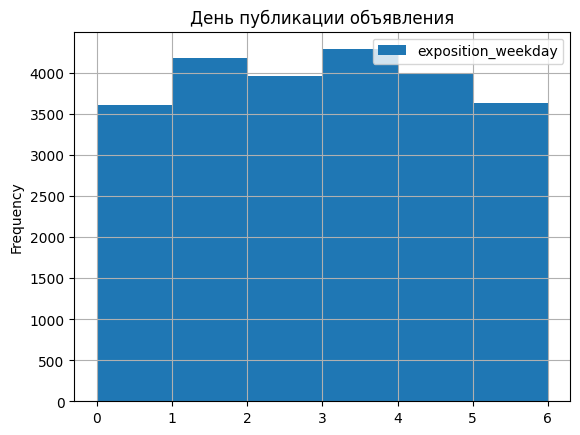

In [51]:
data.plot(y='exposition_weekday',
          kind='hist',
          bins=6,
          range=(0, 6),
          grid=True,
          title='День публикации объявления')
plt.show()

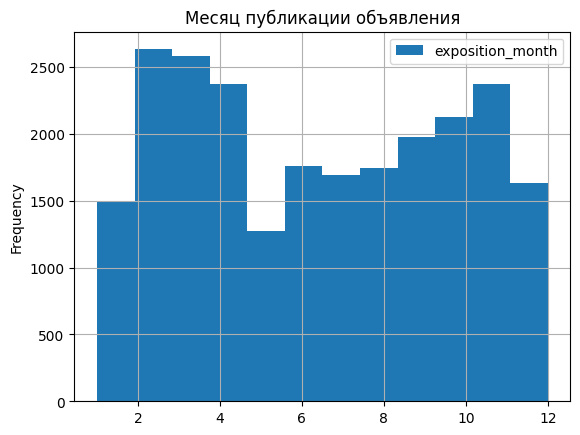

In [52]:
data.plot(y='exposition_month',
          kind='hist',
          bins=12,
          range=(1, 12),
          grid=True,
          title='Месяц публикации объявления')
plt.show()

- Наиболее часто продают квартиры с общей площадью от 30 до 80кв/м.
- Чаще всего жилая площадь от 15 до 60кв/м.
- Площадь кухни обычно от 5 до 15кв/м.
- Большинство квартир в объявлениях стоят от 3х до 8и миллионов рублей.
- В объявлениях преобладают квартиры с количеством комнат от 1 до 3х.
- Высота потолков обычно от 2,4 до 3м.
- Большинство квартир в объявлениях расолагаются на 1-9 этажах.
- Чаще всего квартиры продают в пятиэтажках и девятиэтажках.
- Большинство объявлений образуют квартиры в 4-17км от центра.
- Обычно расстояние до оближайшего аэропорта в объявлениях от 10 до 55км.
- Если пользователи сервиса указывают информацию о парке - скорее всего он расположен в километре от продаваемой квартиры.
- Реже всего объявления на продажу выставляют в мае и июне, а чаще всего в феврале, марте, апреле и ноябре. День недели никак не влияет на кол-во выкладываемых объявлений.

### Исследование как быстро продавались квартиры.

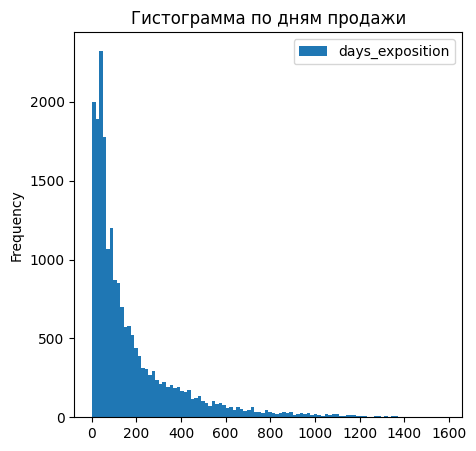

In [53]:
data.plot(y='days_exposition',
          kind='hist',
          bins=100,
          title='Гистограмма по дням продажи',
          figsize=(5, 5))
plt.show()

Примем верхнюю границу дней продажи в 900 дней, а нижнюю - в 30дней.

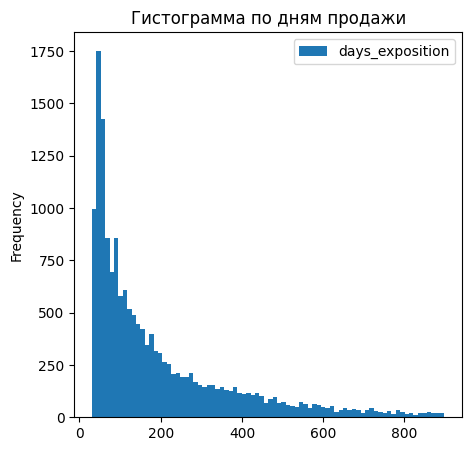

In [54]:
data_sale_days = data.query('30 < days_exposition < 900')
data_sale_days.plot(y='days_exposition',
                    kind='hist',
                    bins=80,
                    title='Гистограмма по дням продажи',
                    figsize=(5, 5))
plt.show()

In [55]:
data_sale_days.days_exposition.agg(['mean', 'median'])

mean      195.309608
median    126.000000
Name: days_exposition, dtype: float64

- Среднее время продажи - 195 дней, а медианное - 126 день.
- Слишком быстрыми можно считать продажи до 30ти дней, а слишком долгими - 900 дней.

### Влияние факторов на общую стоимость объекта

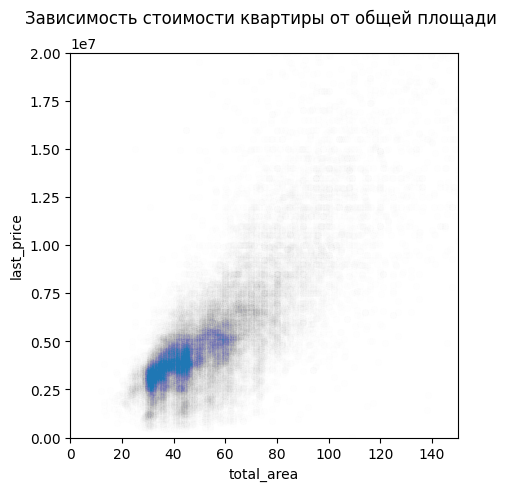

Коэффициент корреляции равен: 0.7351147234570252


In [56]:
data.plot(x='total_area',
          y='last_price',
          kind='scatter',
          style='o',
          ylim=(0, 20000000),
          xlim=(0, 150),
          alpha=0.003,
          figsize=(5, 5),
          title='Зависимость стоимости квартиры от общей площади \n')
plt.show()
print('Коэффициент корреляции равен:',
      data['total_area'].corr(data['last_price']))

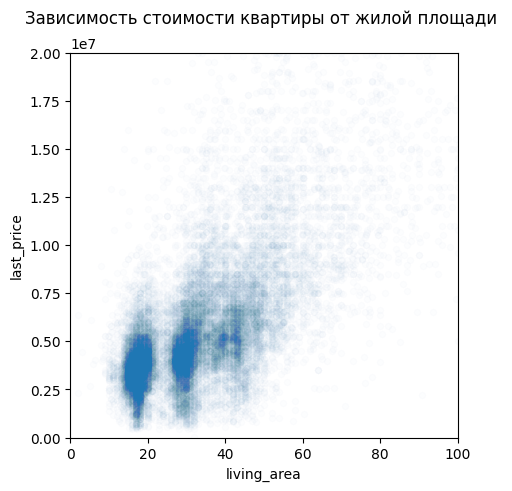

Коэффициент корреляции равен: 0.6514008127434917


In [57]:
data.plot(x='living_area',
          y='last_price',
          kind='scatter',
          style='o',
          ylim=(0, 20000000),
          xlim=(0, 100),
          alpha=0.01,
          figsize=(5, 5),
          title='Зависимость стоимости квартиры от жилой площади \n')
plt.show()
print('Коэффициент корреляции равен:',
      data['living_area'].corr(data['last_price']))

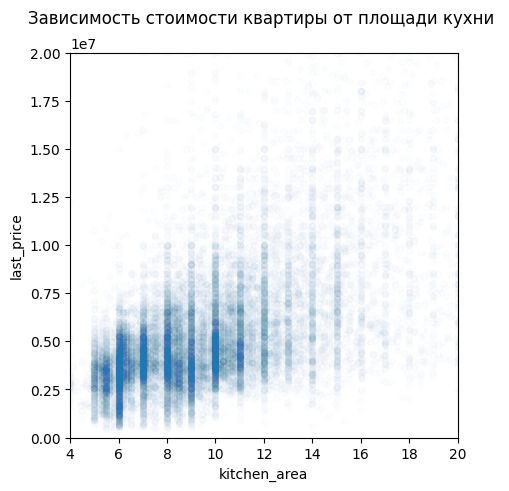

Коэффициент корреляции равен: 0.5617276879517767


In [58]:
data.plot(x='kitchen_area',
          y='last_price',
          kind='scatter',
          style='o',
          ylim=(0, 20000000),
          xlim=(4, 20),
          alpha=0.01,
          figsize=(5, 5),
          title='Зависимость стоимости квартиры от площади кухни \n')
plt.show()
print('Коэффициент корреляции равен:',
      data['kitchen_area'].corr(data['last_price']))

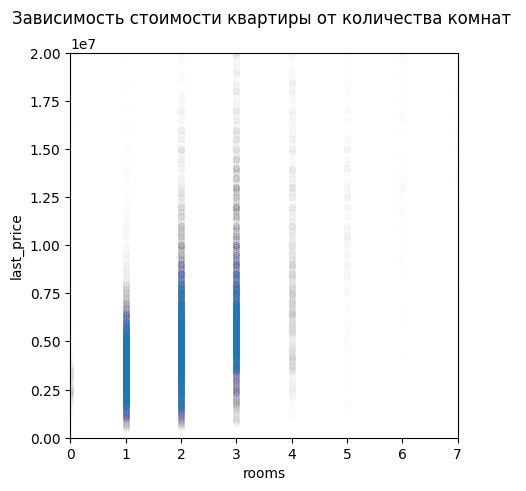

Коэффициент корреляции равен: 0.5617276879517767


In [59]:
data.plot(x='rooms',
          y='last_price',
          kind='scatter',
          style='o',
          ylim=(0, 20000000),
          xlim=(0, 7),
          alpha=0.003,
          figsize=(5, 5),
          title='Зависимость стоимости квартиры от количества комнат \n')
plt.show()
print('Коэффициент корреляции равен:',
      data['kitchen_area'].corr(data['last_price']))

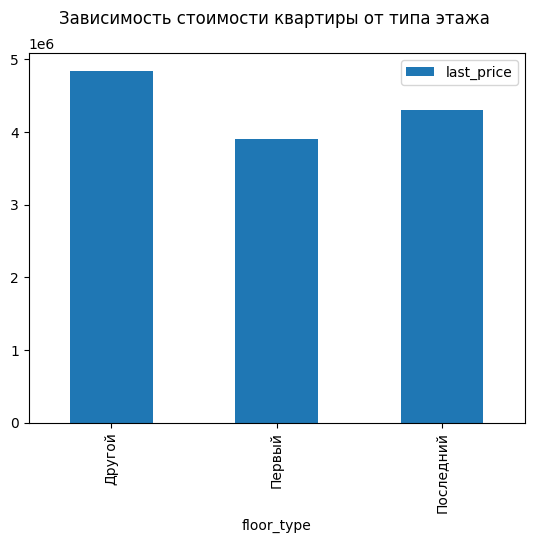

In [60]:
(
    data
    .pivot_table(index='floor_type', values='last_price',aggfunc='median')
    .plot.bar(y='last_price', title='Зависимость стоимости квартиры от типа этажа \n')
)
plt.show()

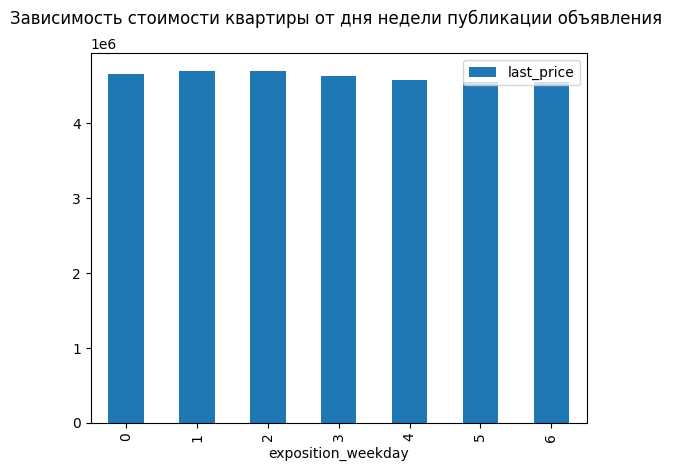

In [61]:
(
    data
    .pivot_table(index='exposition_weekday', values='last_price',aggfunc='median')
    .plot.bar(y='last_price', title='Зависимость стоимости квартиры от дня недели публикации объявления \n')
)
plt.show()

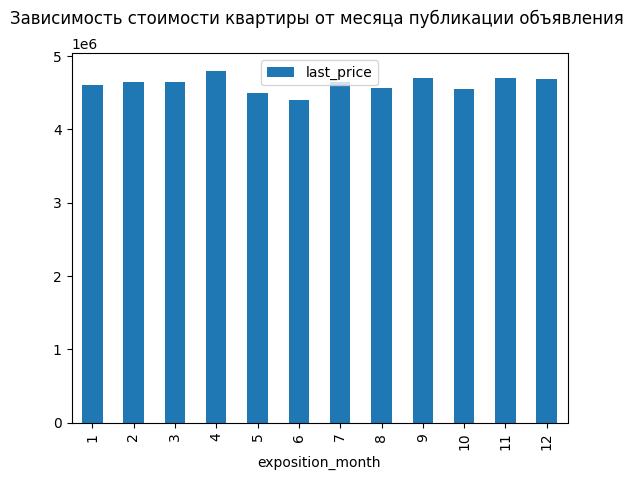

In [62]:
(
    data
    .pivot_table(index='exposition_month', values='last_price',aggfunc='median')
    .plot.bar(y='last_price', title='Зависимость стоимости квартиры от месяца публикации объявления \n')
)
plt.show()

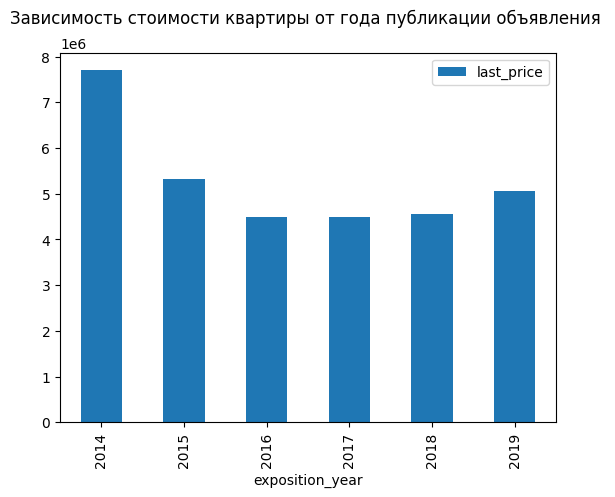

In [63]:
(
    data
    .pivot_table(index='exposition_year', values='last_price', aggfunc='median')
    .plot.bar(y='last_price', title='Зависимость стоимости квартиры от года публикации объявления \n')
)
plt.show()


Мы изучили зависимости общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира (первый, последний, другой) и даты размещения (день недели, месяц, год) на стоимость квартиры.
- Год, месяц, день недели, а так же тип этажа в объявлении не влияет на стоимость квартиры.
- Влияние на цену имеют общая площадь, жилая площадь, площадь кухни и количество комнат.
- Наибольшое влияние на стоимость квартиры имеет общая площадь.

### Рассчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [64]:
# Сводная таблица со средней ценой квадратного метра и количеством объявлений группированная по населенным пунктам
data_meter_price_grouped = (data.pivot_table(index='locality_name',
                                             values='square_meter_price',
                                             aggfunc=['median',
                                                      'count']).reset_index())
data_meter_price_grouped.columns = [
    'Населенный пункт', 'Средняя цена за кв. м.', 'Количество объявлений'
]

# Топ 10 по количеству объявлений
data_meter_price_top10 = (data_meter_price_grouped.sort_values(
    by='Количество объявлений', ascending=False).head(10).reset_index(
        drop=True).set_index('Населенный пункт').sort_values(
            by='Средняя цена за кв. м.', ascending=False))

data_meter_price_top10

,Средняя цена за кв. м.,Количество объявлений
Населенный пункт,,
Санкт-Петербург,104761.904762,15677
Пушкин,100000.000000,369
Кудрово,95675.473579,472
Парголово,91642.857143,327
Мурино,86175.643522,590
Шушары,76876.172608,440
Колпино,74722.222222,337
Гатчина,67796.610169,307
Всеволожск,65789.473684,398


In [65]:
data_meter_price_top10.loc[['Санкт-Петербург', 'Выборг']]

,Средняя цена за кв. м.,Количество объявлений
Населенный пункт,,
Санкт-Петербург,104761.904762,15677
Выборг,58158.319871,237


- Самая большая цена за квадратный метр в самом Санкт-Петербурге, а самая маленькая в Выборге.

### Зависимость цены от расстояния до центра города.

In [66]:
# Сводная таблица со средней ценой и расстоянием до центра в км в Санкт-Петербурге
data_spb = (data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='km_to_center', values='last_price',
    aggfunc=['median', 'count']).reset_index())
data_spb.columns = ['km_to_center', 'median_price', 'count']
data_spb.head(10)

,km_to_center,median_price,count
0,0.0,11750000.0,86
1,1.0,10500000.0,233
2,2.0,9500000.0,303
3,3.0,8500000.0,522
4,4.0,9900000.0,899
5,5.0,8900000.0,759
6,6.0,8000000.0,468
7,7.0,7500000.0,404
8,8.0,6500000.0,670
9,9.0,5000000.0,687


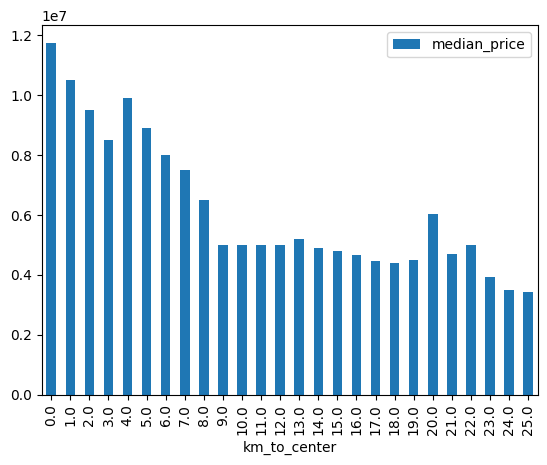

Коэффициент корреляции равен: -0.7508017419984665


In [67]:
(data_spb.query('count > 20').plot(x='km_to_center',
                                   y='median_price',
                                   kind='bar'))
plt.show()
print('Коэффициент корреляции равен:',
      data_spb['km_to_center'].corr(data_spb['median_price']))

- Расстояние до центра сильно влияет на стоимость квартиры. Этот параметр имеет самый значительный коэффициент корреляции за все исследование. 

## Общий вывод

В данной работе был произведен исследовательский анализ данных из архива объявлений о продаже недвижимости через сервис Яндекс.Недвижимость в Санкт-Петербурге.

- В исходных данных были исправлены пропуски значений, неверные типы данных, аномальные значения и неявные дубликаты.
- Для дальнейшего исследования были добавлены новые столбцы в датасет с ценой одного квадратного метра, днем недели публикации объявления, месяцем публикации объявления, годом публикации объявления, типом этажа квартиры («первый», «последний», «другой»), расстоянием до центра города в километрах.
- Для поиска закономерностей были построены гистограммы и диаграммы рассеяния отображающие влияние исходных и добавленных в таблицу параметров на конечную стоимость объекта недвижимости.

В результате исследования я выявил следующие вещи:

- Слишком быстрыми можно считать продажи до 30 дней, а слишком долгими свыше 900 дней.
- Влияние на цену имеют общая площадь, жилая площадь, площадь кухни, количество комнат и расстояние до центра.
- Наибольшое влияние на стоимость квартиры имеет расстояние до центра. Этот параметр имеет самый значительный коэффициент корреляции за все исследование. Параметр "общая площадь" слегка ему уступает, но тоже хорошо влияет на стоимость квартиры.
- В разных населенных пунктах средняя стоимость квадратного метра отличается, иногда почти в 2 раза.

Эти данные можно использовать для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности.